# Step : 1 importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Reading the Dataset

In [2]:
dataset = pd.read_csv("housing_prices_SLR.csv")

In [3]:
dataset.head(7) # 1240 6500 , 6200 ,6300 ,7000

,AREA,PRICE
0,1000,5618
1,1030,5201
2,1060,4779
3,1090,5425
4,1120,5657
5,1150,4945
6,1180,6475


# Step 3 : Seperating the Features and Target

In [4]:
x = dataset[["AREA"]]

In [5]:
x.head()

,AREA
0,1000
1,1030
2,1060
3,1090
4,1120


In [6]:
y = dataset["PRICE"]

In [7]:
y.head()

0    5618
1    5201
2    4779
3    5425
4    5657
Name: PRICE, dtype: int64

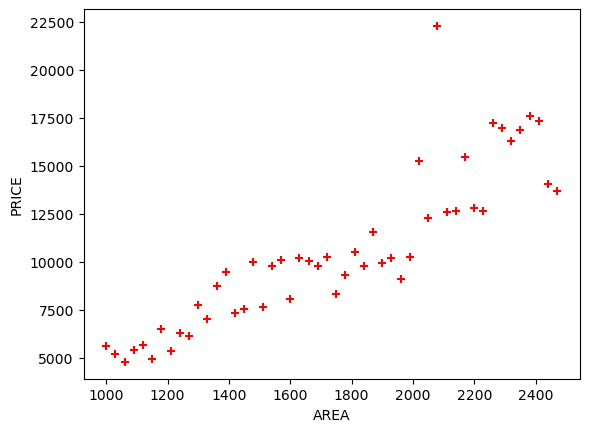

In [8]:
%matplotlib inline
plt.xlabel('AREA')
plt.ylabel('PRICE')
plt.scatter(dataset.AREA,dataset.PRICE,color='red',marker='+')

# Step 4 : Splitting the dataset into training set and test set

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8 ,random_state=42)

# Step 5: Creating the Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Step 6 : Training the Model

In [11]:
model.fit(x_train,y_train)

LinearRegression()

# Step 7 : Testing the Model

In [12]:
model.predict([[1240]])

C:\Users\Siva\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6496.76698197])

# Plotting on Train Data

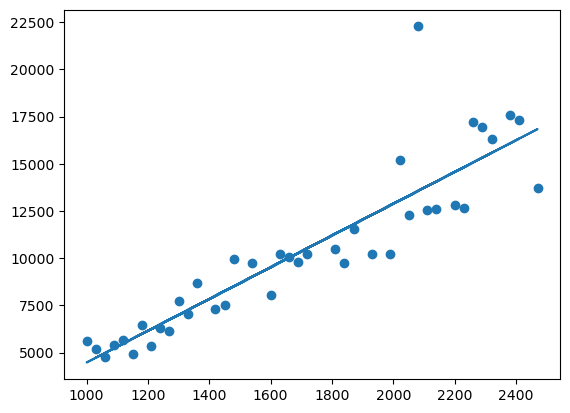

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

# Plotting on Test Data

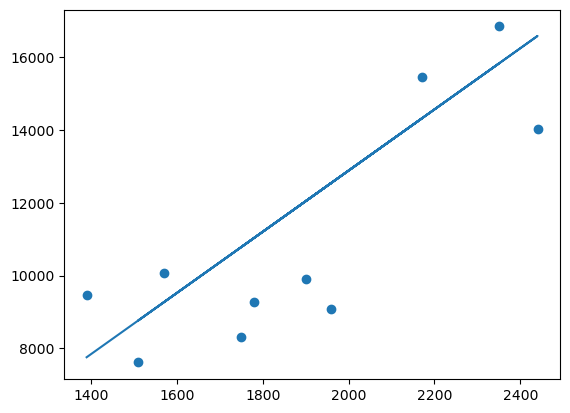

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test))
#plt.scatter(x_test,model.predict(x_test),color='red')

In [15]:
model.coef_

array([8.40672781])

In [16]:
model.intercept_

-3927.575500006107

In [29]:
1240*8.40672781+(-3927.575500006107)

6496.766984393893

In [30]:
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [8.40672781]
Intercept: -3927.575500006107


# Error Metrics 

In [28]:
# Make predictions
y_pred = model.predict(x)
print(y_pred)

[ 4479.15230804  4731.35414228  4983.55597652  5235.75781076
  5487.959645    5740.16147924  5992.36331348  6244.56514772
  6496.76698197  6748.96881621  7001.17065045  7253.37248469
  7505.57431893  7757.77615317  8009.97798741  8262.17982165
  8514.38165589  8766.58349014  9018.78532438  9270.98715862
  9523.18899286  9775.3908271  10027.59266134 10279.79449558
 10531.99632982 10784.19816407 11036.39999831 11288.60183255
 11540.80366679 11793.00550103 12045.20733527 12297.40916951
 12549.61100375 12801.812838   13054.01467224 13306.21650648
 13558.41834072 13810.62017496 14062.8220092  14315.02384344
 14567.22567768 14819.42751193 15071.62934617 15323.83118041
 15576.03301465 15828.23484889 16080.43668313 16332.63851737
 16584.84035161 16837.04218586]


Coefficients: The slope of the regression line.
Intercept: The y-intercept of the regression line.
Mean Squared Error (MSE): The average squared difference between the actual and predicted values.
R² Score: The proportion of variance in the dependent variable that is predictable from the independent variable.
Adjusted R² Score: Adjusted R², which accounts for the number of predictors in the model.

# Calculate metrics

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Calculate Adjusted R^2
n = len(y)  # number of observations
p = x.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')
print(f'Adjusted R^2 Score: {adjusted_r2}')

Coefficients: [8.40672781]
Intercept: -3927.575500006107
Mean Squared Error (MSE): 3605483.428706046
R^2 Score: 0.7749318354945867
Adjusted R^2 Score: 0.7702429154007239


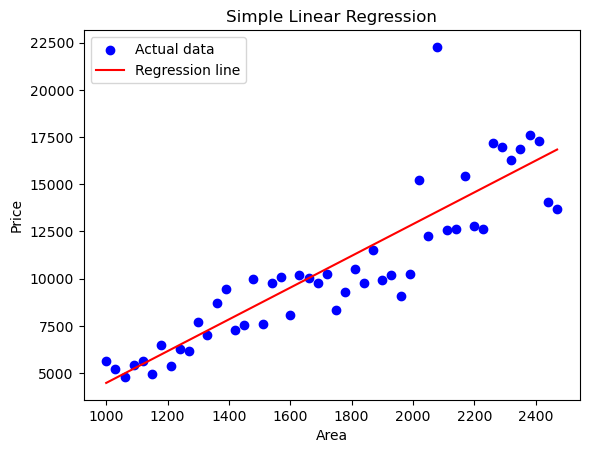

In [27]:
# Plotting the regression line
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In the context of evaluating a linear regression model for predicting housing prices based on the area of a property, both R² (R-squared) and Adjusted R² are useful metrics, but they serve slightly different purposes.

### R² (R-squared)
R², or the coefficient of determination, measures the proportion of the variance in the dependent variable (PRICE) that is predictable from the independent variable (AREA). It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean.

- **Interpretation:** A higher R² value indicates that the model fits the data well and explains a larger proportion of the variance.
- **Limitations:** R² tends to increase with the addition of more predictors (even irrelevant ones), which can be misleading. It does not penalize for overfitting.

### Adjusted R²
Adjusted R² is a modified version of R² that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary predictors that do not improve the model significantly.

- **Purpose:** Adjusted R² helps to provide a more accurate measure of the model's goodness-of-fit by penalizing the model for adding predictors that do not improve the explanatory power.
- **Interpretation:** Like R², Adjusted R² also ranges from 0 to 1, and a higher value indicates a better fit. It is generally lower than R² when there are fewer predictors and can increase or decrease depending on whether adding more predictors improves the model sufficiently.

### Choosing Between R² and Adjusted R²

- **R² is good when:** 
  - You want a general idea of how well the model fits the data.
  - You are not concerned about overfitting due to the inclusion of potentially irrelevant predictors.

- **Adjusted R² is good when:**
  - You want a more conservative measure of model fit that accounts for the number of predictors.
  - You are concerned about overfitting and want to penalize the model for including unnecessary predictors.

### Evaluation for the Given Example

In the provided example of predicting housing prices based on area:
- If the model has only one predictor (AREA), Adjusted R² may not differ significantly from R² because there are no additional predictors to penalize.
- Both R² and Adjusted R² will provide similar insights into how well the linear regression model explains the variation in housing prices based on area.

**Conclusion:** For this specific example with a single predictor (AREA), both R² and Adjusted R² would likely be very similar and either can be used to evaluate the model's performance. If there were additional predictors in the model, Adjusted R² would be preferred to provide a more accurate assessment by penalizing unnecessary predictors.